In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("C:\\pycharm transfers\\train.csv")
testdf = pd.read_csv("C:\\pycharm transfers\\test.csv")
testdf = testdf.drop("SalePrice", axis=1)
mean = df.mean()
std = df.std()
df = (df - mean) / std
testdf = (testdf - mean.drop("SalePrice")) / std.drop("SalePrice")
print(testdf)


     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0       1.390080   0.855859    1.652111    1.302035     0.063431 -0.117680   
1      -0.077262   0.210840   -1.044836   -0.650641     0.411893  1.201753   
2       0.656409  -0.569670    0.303637    0.017504    -1.026918 -1.663891   
3      -0.810932   0.071532    0.303637    1.579645     1.129051  1.013631   
4      -1.544603  -1.701315   -1.044836   -0.895314    -0.959474 -1.380419   
..           ...        ...         ...         ...          ...       ...   
287    -0.077262  -0.693712    0.303637    0.469207     0.227546 -0.019753   
288    -0.077262  -1.020038   -1.044836   -0.998829    -1.289951 -1.759241   
289    -0.077262  -1.285297    0.303637   -0.264811    -0.469379 -0.818629   
290     0.656409  -0.487612    0.303637   -0.415379     0.470345  0.258565   
291    -0.077262  -0.071594    0.303637   -0.391853    -0.615508 -0.986135   

     FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0    0.7

In [6]:
def LinearRegressionModel (w,b,df,lr,alpha):
    m = len(df)
    wg = np.zeros(len(w))
    bg = 0
    mse = 0
    smse = 0
    for i in range (m):
        x = df.iloc[i][:-1].values        
        y = df.iloc[i].SalePrice
        error = np.dot(w,x) + b - y
        wg += error * x
        bg += error
        mse = mse + error**2
        smse = mse*std.SalePrice + mean.SalePrice
    wg += (alpha * w)/m
    w = w - (1/m)*wg*lr
    b = b - (1/m)*bg*lr
    smse = smse/m
    return(w,b,smse)

In [10]:
n = len(df.columns) - 1
b = 0
w = np.zeros(n)
alpha = 5
lr = 0.001
epochs = 1500
smse = 0
cost_history = []
for i in range (epochs):
    if i%50==0:
        print ("Epochs : ", i)
        print ("MSE ", smse)
    w,b,smse = LinearRegressionModel (w,b,df,lr,alpha)
    cost_history.append(smse)
print (w,b)


Epochs :  0
MSE  0
Epochs :  50
MSE  56660.2520343476
Epochs :  100
MSE  42479.92793124051
Epochs :  150
MSE  34056.88780857525
Epochs :  200
MSE  29037.408843105513
Epochs :  250
MSE  26030.77813251333
Epochs :  300
MSE  24215.23993056297
Epochs :  350
MSE  23105.18822958064
Epochs :  400
MSE  22413.623180921462
Epochs :  450
MSE  21970.889481423652
Epochs :  500
MSE  21676.666233211494
Epochs :  550
MSE  21471.601855989436
Epochs :  600
MSE  21320.555371261886
Epochs :  650
MSE  21202.694798572906
Epochs :  700
MSE  21105.64679381243
Epochs :  750
MSE  21022.03981491078
Epochs :  800
MSE  20947.46143098207
Epochs :  850
MSE  20879.251149396525
Epochs :  900
MSE  20815.786903946835
Epochs :  950
MSE  20756.06323076533
Epochs :  1000
MSE  20699.441802334946
Epochs :  1050
MSE  20645.503816272798
Epochs :  1100
MSE  20593.962582581964
Epochs :  1150
MSE  20544.611696229607
Epochs :  1200
MSE  20497.29425133656
Epochs :  1250
MSE  20451.884502547775
Epochs :  1300
MSE  20408.276894238676

In [11]:
prprices = [np.dot(w, x) + b for x in testdf.values]
acprices = testdf.iloc[:, -1].values  


Mean Squared Error (MSE) : 20250.15804738917


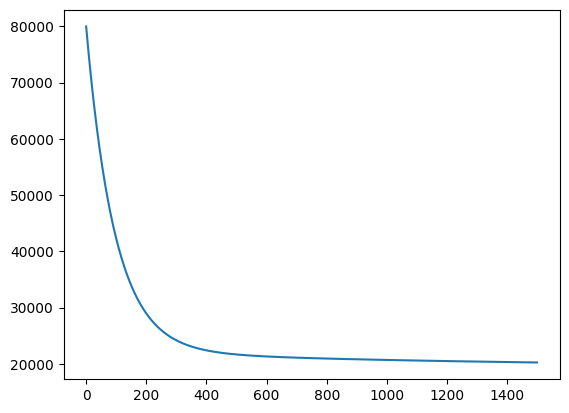

In [12]:

print("Mean Squared Error (MSE) :", smse)
plt.plot(range(epochs),cost_history)
plt.show()

In [40]:
ogprices_unscaled = []
errors = []
for i in prprices:
    indprprice = (i * std.SalePrice) + mean.SalePrice
    ogprices_unscaled.append(indprprice)
df = pd.read_csv("C:\\pycharm transfers\\test.csv")
prprices_unscaled = list(df.SalePrice)
if (len(prprices_unscaled) == len(ogprices_unscaled)):
    errors = [pr - og for pr, og in zip(prprices_unscaled, ogprices_unscaled)]

    error_table = pd.DataFrame({'Original Prices': ogprices_unscaled, 'Predicted Prices': prprices_unscaled, 'Error': errors})

    print(error_table)



     Original Prices  Predicted Prices         Error
0      267524.985828            281000  13475.014172
1      182321.456622            139000 -43321.456622
2      170539.433254            147400 -23139.433254
3      180089.819315            153500 -26589.819315
4       77801.545402             86000   8198.454598
..               ...               ...           ...
287    180735.174354            158000 -22735.174354
288    119191.896205            118000  -1191.896205
289    148097.215926            140000  -8097.215926
290    208855.268031            159895 -48960.268031
291    190002.650441            178900 -11102.650441

[292 rows x 3 columns]


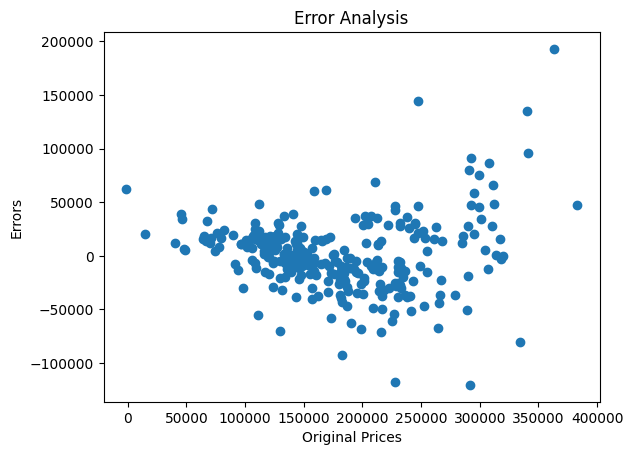

In [41]:
plt.scatter(ogprices_unscaled, errors)
plt.title('Error Analysis')
plt.xlabel('Original Prices')
plt.ylabel('Errors')
plt.show()
